<a href="https://colab.research.google.com/github/vikpy/EconometricsSem3/blob/master/DS3_lec3_White_Noise_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyforest 
from pyforest import * 

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13715 sha256=c50bbefb3153467dcb3e66c3fd727f7cf292858ddf6e27e75585cfea86fd2d3b
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


# Time Series Properties

**Random Walk - White Noise
White noise series normally follows a random walk**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
# Data work
mydataraw = pd.read_csv("/content/oilpriceindex.csv")

In [4]:
mydataraw1 = mydataraw.copy()

In [5]:
mydataraw.head()

,DATE,WTI,BRENT,INR,NIFTY
0,01-01-1990,22.86,21.25,35.6,0.44
1,02-01-1990,22.11,19.81,35.6,2.45
2,03-01-1990,NaN,18.39,35.9,-0.28
3,04-01-1990,18.43,16.61,36.3,-6.18
4,05-01-1990,18.20,16.35,36.3,-1.62


In [6]:
mydataraw.describe()

,WTI,BRENT,INR,NIFTY
count,360.000000,359.000000,357.000000,358.000000
mean,47.843528,49.330808,96.766106,0.193324
std,29.194188,32.860975,27.851830,1.890878
min,11.350000,9.820000,35.600000,-6.180000
25%,21.295000,19.755000,76.800000,-0.782500
50%,40.950000,41.580000,95.200000,0.185000
75%,68.397500,70.905000,113.900000,1.080000
max,133.880000,132.720000,154.300000,17.740000


In [9]:
mydataraw.isna().sum()

DATE     0
WTI      1
BRENT    2
INR      4
NIFTY    3
dtype: int64

In [10]:
mydataraw.NIFTY.isna().sum()

3

In [31]:
# We will use the fill method
# We can do a forward fill
# Or we can do a backward fill
mydataraw1.WTI = mydataraw1.WTI.fillna(method='ffill')

In [12]:
mydataraw1.WTI.isna().sum()

0

In [32]:
mydataraw1.BRENT = mydataraw1.BRENT.fillna(method='bfill')

In [34]:
mydataraw1.BRENT.isna().sum()

0

In [33]:
mydataraw1.INR = mydataraw1.INR.fillna(method='bfill')

In [35]:
mydataraw1.INR.isna().sum()

0

In [36]:
mydataraw1.NIFTY = mydataraw1.NIFTY.fillna(value=mydataraw1.NIFTY.mean())

In [37]:
mydataraw1.isna().sum()

DATE     0
WTI      0
BRENT    0
INR      0
NIFTY    0
dtype: int64

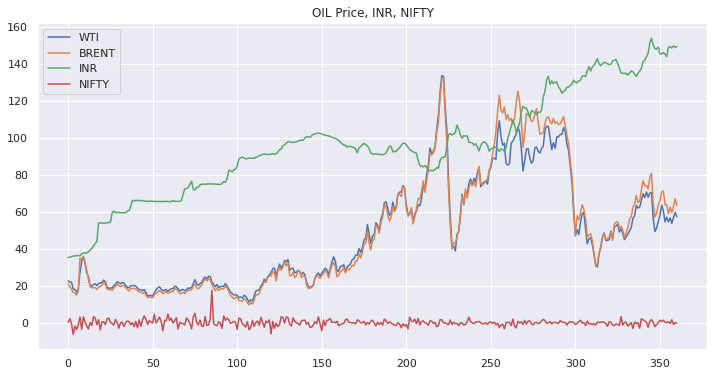

In [38]:
mydataraw1.plot(figsize=(12,6), title="OIL Price, INR, NIFTY")
plt.show()

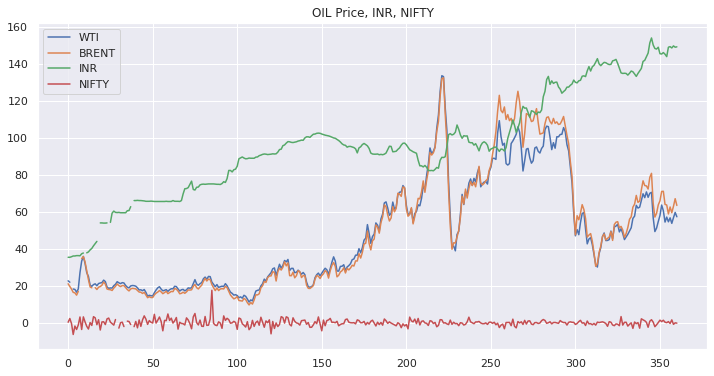

In [22]:
mydataraw1.plot(figsize=(12,6), title="OIL Price, INR, NIFTY")
plt.show()

# Quantile-Quantile Plot (QQ Plot)


In [40]:
import scipy.stats 
import pylab

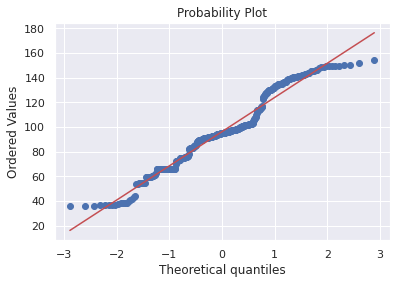

In [42]:
scipy.stats.probplot(mydataraw1.INR, plot = pylab)
pylab.show()

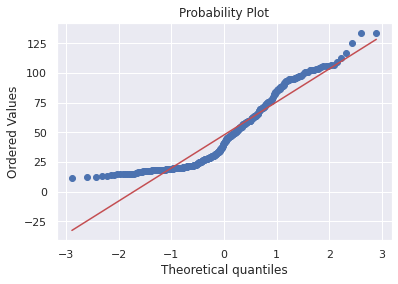

In [43]:
scipy.stats.probplot(mydataraw1.WTI, plot = pylab)
pylab.show()

Deviation from the red line in the above plot means how much the value is deviating from the normal distribution 

In [44]:
mydataraw1.head()

,DATE,WTI,BRENT,INR,NIFTY
0,01-01-1990,22.86,21.25,35.6,0.44
1,02-01-1990,22.11,19.81,35.6,2.45
2,03-01-1990,22.11,18.39,35.9,-0.28
3,04-01-1990,18.43,16.61,36.3,-6.18
4,05-01-1990,18.20,16.35,36.3,-1.62


In [45]:
mydataraw1.DATE.describe()

count            361
unique           361
top       12-01-2005
freq               1
Name: DATE, dtype: object

# Reading the data again for ADF test

In [74]:
mydatats = pd.read_csv("oilpriceindex.csv", na_values = ["null"], index_col="DATE", parse_dates=True, infer_datetime_format=True)


In [75]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,35.6,0.44
1990-02-01,22.11,19.81,35.6,2.45
1990-03-01,NaN,18.39,35.9,-0.28
1990-04-01,18.43,16.61,36.3,-6.18
1990-05-01,18.20,16.35,36.3,-1.62




#**Creating a duplicate variable.**


In [76]:
mydatats["INR_INR"] = mydatats.INR

In [77]:
mydatats.describe()

,WTI,BRENT,INR,NIFTY,INR_INR
count,360.000000,359.000000,357.000000,358.000000,357.000000
mean,47.843528,49.330808,96.766106,0.193324,96.766106
std,29.194188,32.860975,27.851830,1.890878,27.851830
min,11.350000,9.820000,35.600000,-6.180000,35.600000
25%,21.295000,19.755000,76.800000,-0.782500,76.800000
50%,40.950000,41.580000,95.200000,0.185000,95.200000
75%,68.397500,70.905000,113.900000,1.080000,113.900000
max,133.880000,132.720000,154.300000,17.740000,154.300000


In [78]:
del mydatats["INR_INR"]

In [79]:
mydatats.describe()

,WTI,BRENT,INR,NIFTY
count,360.000000,359.000000,357.000000,358.000000
mean,47.843528,49.330808,96.766106,0.193324
std,29.194188,32.860975,27.851830,1.890878
min,11.350000,9.820000,35.600000,-6.180000
25%,21.295000,19.755000,76.800000,-0.782500
50%,40.950000,41.580000,95.200000,0.185000
75%,68.397500,70.905000,113.900000,1.080000
max,133.880000,132.720000,154.300000,17.740000


In [80]:
len(mydatats)

361

In [81]:
# 80% for training and rest for testing
size  = int(len(mydatats)*0.8)
mydatats_train = mydatats.iloc[:size]
mydatats_test = mydatats.iloc[size:]

In [82]:
len(mydatats_train)


288

In [83]:
len(mydatats_test)

73

In [84]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [85]:
mydatats_test.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
2014-01-01,94.62,108.12,130.3,0.34
2014-02-01,100.82,108.90,130.4,0.07
2014-03-01,100.80,107.48,127.8,-0.16
2014-04-01,102.07,107.76,126.6,1.35
2014-05-01,102.18,109.54,124.4,0.65


In [86]:
white_noise = np.random.normal(loc= mydatats.INR.mean(), scale = mydatats.INR.std(), size = mydatats.shape[0])
mydatats["WN_INR"] = white_noise

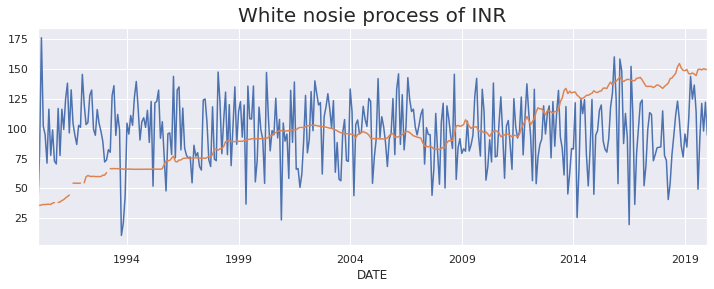

In [87]:
mydatats.WN_INR.plot(figsize = (12,4))
mydatats.INR.plot(figsize=(12, 4))
plt.title("White nosie process of INR", size = 20)
plt.show()

In [88]:
#mydatats.INR = mydatats.INR.fillna(method='bfill')
#mydatats.WTI = mydatats.WTI.fillna(method='bfill')
#mydatats.BRENT = mydatats.BRENT.fillna(method='bfill')
#mydatats.NIFTY = mydatats.NIFTY.fillna(method='bfill')

mydatats.INR = mydatats.INR.fillna(method='ffill')
mydatats.WTI = mydatats.WTI.fillna(method='ffill')
mydatats.BRENT = mydatats.BRENT.fillna(method='ffill')
mydatats.NIFTY = mydatats.NIFTY.fillna(method='ffill')

In [89]:
mydatats.describe()

,WTI,BRENT,INR,NIFTY,WN_INR
count,361.000000,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.157922,96.245983,0.189557,97.028566
std,29.185056,32.851631,28.148450,1.889088,27.350056
min,11.350000,9.820000,35.600000,-6.180000,10.437887
25%,21.300000,19.570000,75.500000,-0.790000,78.159605
50%,40.780000,39.950000,95.100000,0.180000,96.859125
75%,68.060000,70.760000,113.800000,1.080000,117.890507
max,133.880000,132.720000,154.300000,17.740000,175.879072


In [90]:
sts.adfuller(mydatats.INR)

(-1.1290406537170836,
 0.7033530053152008,
 1,
 359,
 {'1%': -3.4486972813047574,
  '10%': -2.571077032068342,
  '5%': -2.8696246923288418},
 1332.3497409741647)

----------------------------------------------------------------------------------------
Output values
(z_statistic, p value, lags, degrees of freedom, {1%, 10%, 5%, AIC})

if output values is greater than 1%, 10% and 5% then we reject the null hypothesis.

----------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------

INR = alpha + beta1(INRt-1)  + beta2(INRt-2)

----------------------------------------------------------------------------------------

In [91]:
sts.adfuller(mydatats.WN_INR)

(-17.568811373530803,
 4.061357103537721e-30,
 0,
 360,
 {'1%': -3.448645946352023,
  '10%': -2.5710650077160495,
  '5%': -2.869602139060357},
 3237.8930150362557)